Centroids: {' Acceptance   ': array([17.33333333, 35.        ]), ' Acceptance      ': array([16.8, 33.6]), ' Accomplishment ': array([26.        , 51.66666667]), ' Admiration ': array([22., 45.]), ' Admiration   ': array([20., 40.]), ' Admiration    ': array([25., 50.]), ' Adoration    ': array([22., 45.]), ' Adrenaline     ': array([22., 45.]), ' Adventure ': array([30.66666667, 61.66666667]), ' Affection    ': array([15., 30.]), ' Amazement ': array([30., 60.]), ' Ambivalence ': array([14., 28.]), ' Ambivalence     ': array([13.8, 28. ]), ' Amusement    ': array([18., 35.]), ' Amusement     ': array([15., 30.]), ' Anger        ': array([20., 40.]), ' Anticipation ': array([20., 40.]), ' Anticipation  ': array([40., 80.]), ' Anxiety   ': array([10., 20.]), ' Anxiety         ': array([12., 25.]), ' Appreciation  ': array([28., 55.]), ' Apprehensive ': array([14., 28.]), ' Arousal       ': array([20., 40.]), ' ArtisticBurst ': array([15., 30.]), ' Awe ': array([23.25, 46.25]), ' Awe    

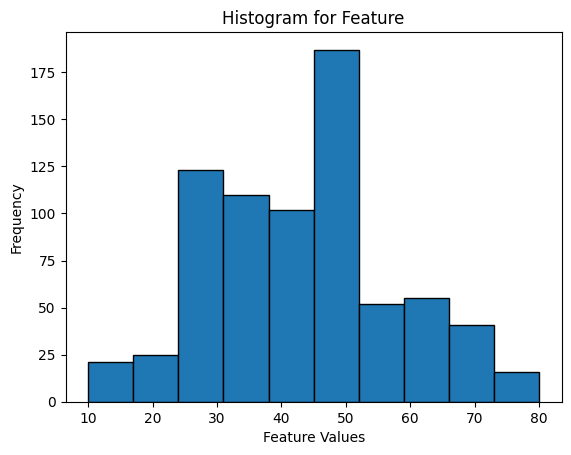

/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2552: RuntimeWarning: overflow encountered in scalar multiply
  sqnorm = x.dot(x)
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2553: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


Minkowski Distances: [22.360679774997898, 20.305431848689306, 20.051747451504212, 20.009748976330773, 20.001952267223597, 20.000406855517436, 20.000087190609595, nan, nan, 8.662821934402839]
Accuracy of kNN Classifier: 0.045454545454545456


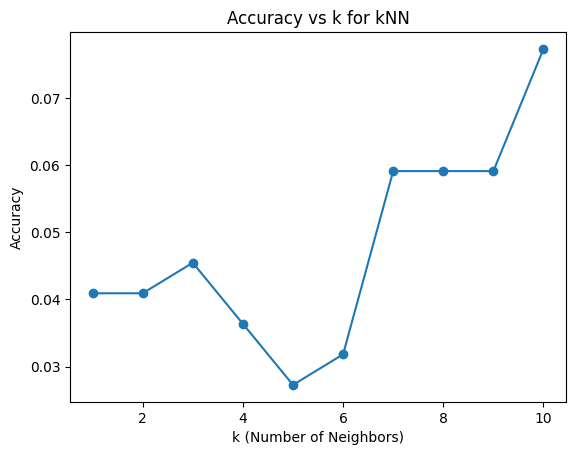

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Precision: 0.06524170274170274
Recall: 0.045454545454545456
F1 Score: 0.04267217630853994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/sentimentdataset.csv')  # Replace 'your_dataset.csv' with the actual filename

# Function 1: Evaluate Intraclass Spread and Interclass Distances
def evaluate_intraclass_interclass(df):
    features = df[['Retweets', 'Likes']].values
    labels = df['Sentiment'].values

    unique_classes = np.unique(labels)
    centroids = {}
    spreads = {}

    for cls in unique_classes:
        class_indices = np.where(labels == cls)
        class_features = features[class_indices]
        centroids[cls] = np.mean(class_features, axis=0)
        spreads[cls] = np.std(class_features, axis=0)

    interclass_distances = np.zeros((len(unique_classes), len(unique_classes)))

    for i in range(len(unique_classes)):
        for j in range(i+1, len(unique_classes)):
            interclass_distances[i, j] = np.linalg.norm(centroids[unique_classes[i]] - centroids[unique_classes[j]])
            interclass_distances[j, i] = interclass_distances[i, j]

    return centroids, spreads, interclass_distances


# Example Usage:
centroids, spreads, interclass_distances = evaluate_intraclass_interclass(df)
print("Centroids:", centroids)
print("Spreads:", spreads)
print("Interclass Distances:", interclass_distances)

# Function 2: Plot Histogram for a Feature
def plot_histogram(feature, buckets=10):
    plt.hist(feature, bins=buckets, edgecolor='black')
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram for Feature')
    plt.show()

# Example Usage:
# Assuming 'Likes' is a feature from your dataset
plot_histogram(df['Likes'])

# Function 3: Calculate Minkowski Distance for Two Feature Vectors
def calculate_minkowski_distance(vec1, vec2, r):
    return np.linalg.norm(np.abs(vec1 - vec2) ** r) ** (1/r)

# Example Usage:
# Assuming 'Retweets' and 'Likes' are two feature vectors from your dataset
# Select two random indices for illustration purposes
index1, index2 = np.random.choice(len(df), 2, replace=False)
vec1 = df.iloc[index1][['Retweets', 'Likes']].values
vec2 = df.iloc[index2][['Retweets', 'Likes']].values

minkowski_distances = [calculate_minkowski_distance(vec1, vec2, r) for r in range(1, 11)]
print("Minkowski Distances:", minkowski_distances)


# Function 4: Divide Dataset into Train and Test Sets
def split_dataset(df, test_size=0.3):
    X = df[['Retweets', 'Likes']].values
    y = df['Sentiment'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

# Example Usage:
X_train, X_test, y_train, y_test = split_dataset(df)

# Function 5: Train kNN Classifier
def train_knn_classifier(X_train, y_train, k=3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    return knn_classifier

# Example Usage:
knn_classifier = train_knn_classifier(X_train, y_train)

# Function 6: Test Accuracy of kNN Classifier
def test_knn_accuracy(knn_classifier, X_test, y_test):
    return knn_classifier.score(X_test, y_test)

# Example Usage:
accuracy = test_knn_accuracy(knn_classifier, X_test, y_test)
print("Accuracy of kNN Classifier:", accuracy)

# Function 7: Predict Classes for Test Vectors
def predict_classes(knn_classifier, X_test):
    return knn_classifier.predict(X_test)

# Example Usage:
y_pred = predict_classes(knn_classifier, X_test)

# Function 8: Vary k and Make Accuracy Plot for kNN
def vary_k_and_plot_accuracy(X_train, y_train, X_test, y_test, k_range=(1, 11)):
    k_values = list(range(k_range[0], k_range[1]))
    accuracy_values = []

    for k in k_values:
        knn_classifier = train_knn_classifier(X_train, y_train, k)
        accuracy = test_knn_accuracy(knn_classifier, X_test, y_test)
        accuracy_values.append(accuracy)

    plt.plot(k_values, accuracy_values, marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k for kNN')
    plt.show()

# Example Usage:
vary_k_and_plot_accuracy(X_train, y_train, X_test, y_test)

# Function 9: Evaluate Confusion Matrix and Performance Metrics
def evaluate_confusion_matrix_and_metrics(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return confusion_mat, precision, recall, f1

# Example Usage:
confusion_mat, precision, recall, f1 = evaluate_confusion_matrix_and_metrics(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
